# Banco de dados com Python usando sqlite3

### programa que cria um banco de dados fictício com nomes de candidatos e notas num exame, posteriormente realiza a leitura das informações e classifica de acordo com a área pretendida.


#### 1ª parte - Banco de dados
#### 2ª parte - Análise

# 1ª Parte: Banco de dados

In [1]:
import os
import sqlite3
import random
import matplotlib.pyplot as plt


os.remove('rank.db') if os.path.exists('rank.db') else None

In [64]:
%matplotlib notebook

In [ ]:
# instalação de um pacote para gerar nomes falsos
!pip install Faker

In [ ]:
from faker import Faker
fake = Faker(['pt_BR'])
print(fake.name())

In [2]:
# Conecta ao banco de dados e cria um cursor

conn = sqlite3.connect('rank.db')

curr = conn.cursor()

In [3]:
# Função para criar uma tabela
def create_table():
    curr.execute('''CREATE TABLE notas (
    id        INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    nome      VARCHAR(15),
    documento INTEGER,
    curso     VARCHAR(10),
    nota      INTEGER)
    ''')

# Função para inserir dados na tabela
def insert_dados():
    nome = fake.name()
    
    documento = round(100000*(random.random()))
    
    curso = random.choice(['Medicina', 'Física Médica', \
                           'Psicologia', 'Nutrição', \
                           'Terapia Ocupacional', 'Fisioterapia', \
                           'Fonoaudiologia'])
    
    nota = random.randrange(25, 99)
    
    curr.execute('INSERT INTO notas (nome, documento, curso, nota) VALUES (?,?,?,?)', \
                 (nome, documento, curso, nota))
    
    conn.commit()

In [4]:
create_table()

In [5]:
for lista in range(200):
    insert_dados()

In [15]:
# Função para leitura de dados de um determinado curso passado como parâmetro
def leitura_curso(curso):
    curr.execute("SELECT * FROM notas WHERE curso LIKE ? ", (curso,))
    dados = curr.fetchall()
    return dados

In [16]:
# Retorna uma lista de tuplas com todas as informações de candidatos para posterior análise

leitura_curso('Física Médica')

[(4, 'Luiz Miguel Oliveira', 55999, 'Física Médica', 74),
 (7, 'Ana Clara Castro', 66546, 'Física Médica', 74),
 (10, 'Bianca Carvalho', 58028, 'Física Médica', 48),
 (11, 'Vitor Moraes', 96973, 'Física Médica', 83),
 (15, 'Renan Freitas', 74987, 'Física Médica', 47),
 (20, 'Camila Jesus', 64406, 'Física Médica', 89),
 (30, 'Luana da Rocha', 98087, 'Física Médica', 96),
 (31, 'Isabella Teixeira', 33791, 'Física Médica', 59),
 (32, 'Sra. Ana Laura Cardoso', 99743, 'Física Médica', 49),
 (33, 'Mirella da Conceição', 80193, 'Física Médica', 84),
 (54, 'Dr. Arthur da Mota', 34388, 'Física Médica', 98),
 (59, 'Alice Lopes', 70262, 'Física Médica', 59),
 (62, 'Isadora Peixoto', 94884, 'Física Médica', 68),
 (65, 'Luiza da Rosa', 52657, 'Física Médica', 96),
 (73, 'Sra. Ana Vitória Lopes', 94993, 'Física Médica', 75),
 (82, 'Dra. Carolina Peixoto', 82764, 'Física Médica', 68),
 (102, 'Isaac da Mata', 43154, 'Física Médica', 46),
 (109, 'Emanuella da Conceição', 93815, 'Física Médica', 81),
 (

In [43]:
# Função que classifica os candidatos e elimina os que tiveram desempenho abaixo de 70%

def classifica():
    curr.execute("SELECT * FROM notas WHERE curso LIKE 'Física Médica' AND nota > 69 ORDER BY nota DESC;")
    dados = curr.fetchall()
    return dados

In [52]:
# Função que classifica todos os candidatos

def classifica():
    curr.execute("SELECT * FROM notas WHERE curso LIKE 'Física Médica' ORDER BY nota DESC;")
    dados = curr.fetchall()
    return dados

# Issue: Candidatos empatados são classificados na ordem alfabética

In [53]:
classifica()

[(54, 'Dr. Arthur da Mota', 34388, 'Física Médica', 98),
 (30, 'Luana da Rocha', 98087, 'Física Médica', 96),
 (65, 'Luiza da Rosa', 52657, 'Física Médica', 96),
 (145, 'Stella Nunes', 62146, 'Física Médica', 92),
 (20, 'Camila Jesus', 64406, 'Física Médica', 89),
 (33, 'Mirella da Conceição', 80193, 'Física Médica', 84),
 (11, 'Vitor Moraes', 96973, 'Física Médica', 83),
 (159, 'Raquel da Rocha', 616, 'Física Médica', 83),
 (109, 'Emanuella da Conceição', 93815, 'Física Médica', 81),
 (73, 'Sra. Ana Vitória Lopes', 94993, 'Física Médica', 75),
 (4, 'Luiz Miguel Oliveira', 55999, 'Física Médica', 74),
 (7, 'Ana Clara Castro', 66546, 'Física Médica', 74),
 (62, 'Isadora Peixoto', 94884, 'Física Médica', 68),
 (82, 'Dra. Carolina Peixoto', 82764, 'Física Médica', 68),
 (31, 'Isabella Teixeira', 33791, 'Física Médica', 59),
 (59, 'Alice Lopes', 70262, 'Física Médica', 59),
 (110, 'Ana Cardoso', 25191, 'Física Médica', 59),
 (173, 'Felipe Lima', 81555, 'Física Médica', 59),
 (174, 'Noah Az

# 2ª parte - Análise

In [66]:
notas =[]

for i in classifica():
    notas.append(i[4])

<IPython.core.display.Javascript object>


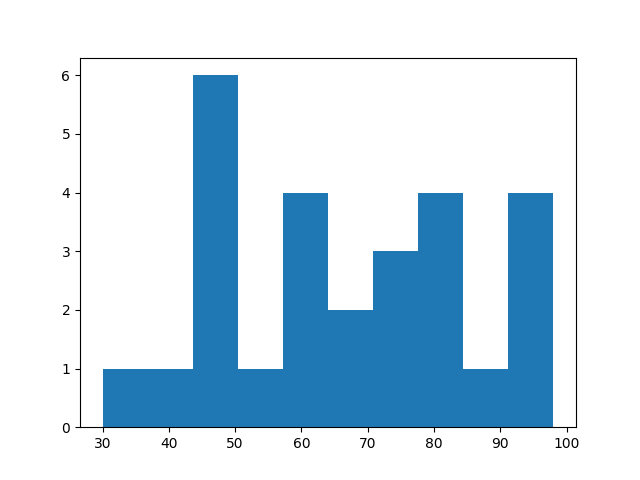

In [67]:
plt.hist(notas)
plt.show()

In [51]:
lista_classificados[0:3]

[(54, 'Dr. Arthur da Mota', 34388, 'Física Médica', 98),
 (30, 'Luana da Rocha', 98087, 'Física Médica', 96),
 (65, 'Luiza da Rosa', 52657, 'Física Médica', 96)]

In [18]:
# retorna a média das notas
curr.execute("SELECT AVG (nota) FROM notas WHERE curso LIKE 'Física Médica' ")

In [19]:
print(curr.fetchall())

[(66.66666666666667,)]
